# Final assignment Unsupervised Learning

## Background information


# Loading in the data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('data/primates-morphology.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,0.360452,0.513323,0.043604,0.294724,-0.003514,Hl,Hylobates,lar,F,A
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-0.368755,-0.173323,-0.627292,0.092090,0.444992,Hl,Hylobates,lar,F,A
162,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,2.706787,...,-0.033229,0.434486,-0.158110,-0.416191,0.160474,Hl,Hylobates,lar,F,A
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,0.125275,-0.018511,0.080169,-0.235063,0.317110,Hl,Hylobates,lar,F,A


In [15]:
# print the shape
print("Shape before dropping na's:", df.shape)
# remove last row as it does not contain values
df = df.dropna()
# dropping na's seems to only drop a single row
print("Shape after dropping na's:", df.shape)

Shape before dropping na's: (165, 35)
Shape after dropping na's: (165, 35)


## Data exploration

In [16]:
df.shape

(165, 35)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   0             165 non-null    float64
 1   1             165 non-null    float64
 2   2             165 non-null    float64
 3   3             165 non-null    float64
 4   4             165 non-null    float64
 5   5             165 non-null    float64
 6   6             165 non-null    float64
 7   7             165 non-null    float64
 8   8             165 non-null    float64
 9   9             165 non-null    float64
 10  10            165 non-null    float64
 11  11            165 non-null    float64
 12  12            165 non-null    float64
 13  13            165 non-null    float64
 14  14            165 non-null    float64
 15  15            165 non-null    float64
 16  16            165 non-null    float64
 17  17            165 non-null    float64
 18  18            165 non-null    

There seem to be 34 columns, where 0 to 29 seem to be numeric and the remaining columns (Abbreviation, Genus, Species, Sex and Age) seem to be labels.

In [18]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,5.537129,1.196007,-0.125596,0.774423,-0.161111,-0.182550,-0.077955,0.180683,0.132617,-0.030271,...,0.057334,-0.014223,0.013269,-0.002892,0.005006,0.003208,-0.001137,-0.002748,-0.012738,-0.013131
std,99.061556,69.971050,56.627559,18.591984,11.336600,8.710069,5.463093,5.214248,4.520787,3.389125,...,1.254471,1.161247,0.971599,0.932425,0.865874,0.750532,0.720479,0.484438,0.461879,0.374258
min,-201.591249,-111.659165,-114.986835,-54.636918,-19.375303,-24.431319,-54.611282,-20.855026,-18.487708,-13.764311,...,-3.793245,-2.894577,-3.849517,-1.838070,-2.274559,-2.037714,-2.934118,-1.245955,-2.115305,-1.128128
25%,-58.767559,-44.542377,-45.981261,-12.328664,-7.348686,-5.823589,-1.389680,-2.572926,-2.279476,-1.834020,...,-0.697783,-0.739499,-0.482541,-0.585089,-0.587203,-0.413921,-0.411248,-0.300449,-0.320591,-0.248282
50%,-4.994670,18.343281,-2.090244,4.082730,-2.158090,-1.071286,-0.124301,-0.379776,-0.057433,-0.158941,...,0.086293,-0.103932,0.123128,-0.072030,-0.018886,-0.023107,-0.022457,0.001251,-0.018000,-0.010527
75%,89.480991,42.633134,32.805157,16.969797,3.716401,5.078963,1.575336,3.017432,3.199454,1.722897,...,0.784991,0.633467,0.526249,0.512882,0.621830,0.474782,0.418680,0.274560,0.277566,0.268744
max,192.170450,433.444316,142.161119,33.486208,68.005131,21.570367,18.598186,20.232449,18.859660,11.154277,...,3.300278,3.376167,3.423704,4.006407,3.131717,2.052453,2.727110,1.319978,1.653007,0.844772


Looking at the values, all columns seem to have highly varying values, thus normalization is mostly likely necessary.

In [19]:
df_vals = df.drop(['Abbreviation', 'Genus', 'Species', 'Sex', 'Age'], axis=1)  # create unlabeled dataframe
df_labels = df[['Abbreviation', 'Genus', 'Species', 'Sex', 'Age']]  # save labels to variable

df_vals.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.697783,-0.406979,0.607499,-1.309488,1.555190,-0.301822,-0.433051,0.037651,-0.279618,-0.421040
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,-0.105124,-0.569739,0.669346,-0.805954,1.583042,0.215340,-0.299550,0.709472,0.876382,-0.150133
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.546710,1.715016,1.269193,-0.397373,-0.813108,-0.481468,-0.243025,-0.537644,-0.140292,0.082158
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,-0.025537,0.972070,-0.066568,0.001964,0.656327,0.586941,-0.043639,-0.518699,-1.051100,0.542354
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.327166,-0.174675,0.368314,-0.700708,-0.450873,0.653851,0.718319,0.798722,-0.396749,0.844772


A correlation matrix will be made to investigate correlation within the dataset. Highly correlated features can be removed as these only bring redundant information. This is preferably removed to create a simpler model with less features.

In [20]:
corr_matrix = df_vals.corr(
    method = 'pearson',  # Correlation method
    min_periods = 1      # Min number of observations required
)

# set diagonal to 0.0 to remove self-correlation
np.fill_diagonal(corr_matrix.values, 0.0)

corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,-0.041708,0.028695,-0.076057,0.013712,0.052373,0.016908,-0.046053,-0.037217,0.046748,...,-0.028925,0.030022,0.024708,-0.024955,0.002520,0.019881,-0.018560,0.057024,-0.025943,0.032286
1,-0.041708,0.000000,0.043172,-0.019783,0.008371,0.008966,-0.003308,-0.008855,-0.021718,0.012890,...,-0.005368,0.017089,-0.014384,0.001424,-0.012147,-0.012350,-0.004888,0.020379,-0.024367,-0.007079
2,0.028695,0.043172,0.000000,0.070564,-0.002763,0.002871,0.008408,-0.008806,0.090029,-0.030186,...,0.034596,-0.044028,0.031256,0.005013,-0.011213,0.048836,-0.000353,-0.022921,0.053242,0.035857
3,-0.076057,-0.019783,0.070564,0.000000,0.013192,0.027493,0.019275,-0.051065,-0.094024,0.023952,...,-0.051799,0.019674,-0.005013,-0.018987,-0.025383,-0.059759,0.001855,0.003891,0.005615,0.030173
4,0.013712,0.008371,-0.002763,0.013192,0.000000,-0.004260,-0.007232,0.025959,-0.002687,0.011894,...,0.018083,-0.010714,0.020395,0.015030,0.009955,0.014735,-0.003238,0.000607,-0.011486,-0.002767
5,0.052373,0.008966,0.002871,0.027493,-0.004260,0.000000,-0.020004,0.020467,0.002156,-0.002816,...,0.005299,-0.036180,-0.020204,0.007033,0.002810,-0.013911,0.005370,-0.004989,-0.005221,-0.033779
6,0.016908,-0.003308,0.008408,0.019275,-0.007232,-0.020004,0.000000,0.023936,-0.005770,0.003889,...,0.012208,-0.035312,-0.010799,0.007769,0.003682,-0.009202,0.000428,0.009804,-0.018152,-0.022768
7,-0.046053,-0.008855,-0.008806,-0.051065,0.025959,0.020467,0.023936,0.000000,-0.005888,0.000203,...,-0.033876,0.027338,-0.008899,-0.020360,-0.031496,-0.017950,0.001465,-0.011085,0.030341,0.017377
8,-0.037217,-0.021718,0.090029,-0.094024,-0.002687,0.002156,-0.005770,-0.005888,0.000000,0.033454,...,-0.048191,-0.017236,-0.017815,0.003400,-0.005688,-0.058593,0.002620,0.015208,-0.009148,0.011517
9,0.046748,0.012890,-0.030186,0.023952,0.011894,-0.002816,0.003889,0.000203,0.033454,0.000000,...,0.009060,-0.002197,-0.021094,-0.014112,0.004557,-0.010829,0.010563,-0.011530,0.015543,0.012355


In [21]:
# Visualize the most highly correlated columns
corr_matrix.abs().idxmax().head(10)

0    13
1     2
2     8
3     8
4     7
5     0
6    15
7     3
8     3
9    12
dtype: object

In [22]:
# Check how hight the correlation is.
corr_matrix.abs().max().head(10)

0    0.098790
1    0.043172
2    0.090029
3    0.094024
4    0.025959
5    0.052373
6    0.039426
7    0.051065
8    0.094024
9    0.055370
dtype: float64

There does not seem to be a high correlation between columns, at most about 10%. 

Another characteristic to be checked is the distribution of the data, which can be done by checking skew.

In [23]:
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (df_vals.skew().sort_values(ascending=False))
print('-- skew --')
print(skew_columns.head(10))
print('\n')

skew_columns_75 = skew_columns.loc[skew_columns > 0.75]
print('-- skew > 0.75 --')
print(skew_columns_75)

print('-- max skew --')
print(skew_columns.max())
print('-- min skew --')
print(skew_columns.min())

-- skew --
4     2.358456
1     1.272854
14    1.267799
23    0.782396
2     0.408304
7     0.348291
5     0.262781
26    0.211428
24    0.192550
21    0.144393
dtype: float64


-- skew > 0.75 --
4     2.358456
1     1.272854
14    1.267799
23    0.782396
dtype: float64
-- max skew --
2.3584561525259016
-- min skew --
-5.635666633355438


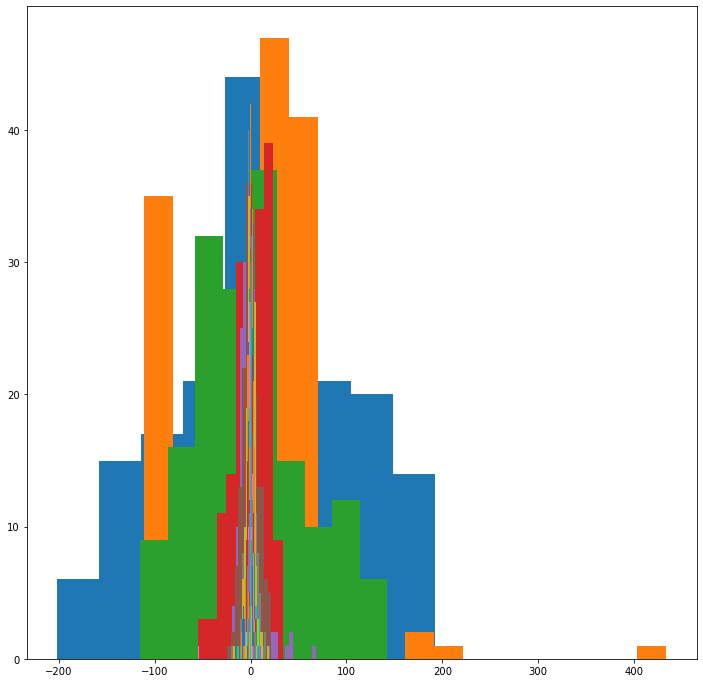

In [26]:
# Plot a histogram to view the data distribution
plt.subplots(figsize =(12, 12))
for col in df_vals.columns:
    plt.hist(df_vals[col], bins='auto')
plt.show()

According to the above information, the dataset seems to be skewed (skew in this dataset varies from -5.63 to 2.35) and after verifying it with a histogram, this indeed seems to be the case.

## Data pre-processing

To resolve the data skewness a number of techniques can be employed, the aim is to get a number as close as possible to zero, such there is minimal skewing in the data.

In [31]:

# df_vals_scaled = scale_data(df_vals)


def absolute_maximum_scale(series):
    return series / series.abs().max()

def col_scaler(df):
    for col in df.columns:
        df[col] = absolute_maximum_scale(df[col])
    return df

df_scaled = col_scaler(df_vals)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.661868,-0.234465,0.148605,-0.210814,0.067952,-0.062197,0.010683,-0.344419,0.074764,0.015723,...,-0.183954,-0.120545,0.157812,-0.326848,0.496593,-0.147054,-0.147592,0.028524,-0.132188,-0.373220
1,0.720987,-0.249697,0.148574,-0.274226,0.033811,-0.096353,0.007896,-0.252550,-0.075530,-0.105487,...,-0.027714,-0.168753,0.173878,-0.201166,0.505487,0.104918,-0.102092,0.537488,0.414305,-0.133081
2,0.683429,-0.247235,0.128252,-0.313273,0.044361,-0.216740,0.031438,-0.080025,-0.101671,0.043672,...,-0.144127,0.507977,0.329702,-0.099184,-0.259637,-0.234582,-0.082827,-0.407313,-0.066322,0.072827
3,0.702033,-0.247867,0.122735,-0.308609,0.049745,-0.043849,0.032391,-0.131155,-0.060272,-0.196663,...,-0.006732,0.287921,-0.017293,0.000490,0.209574,0.285971,-0.014873,-0.392960,-0.496902,0.480756
4,0.706171,-0.224239,0.073940,-0.119345,0.052283,0.067634,-0.012011,-0.257639,-0.077777,-0.190823,...,0.086250,-0.051738,0.095678,-0.174897,-0.143970,0.318571,0.244816,0.605102,-0.187561,0.748827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,-0.451832,-0.106497,0.608385,0.310592,0.126196,-0.363841,0.069699,-0.123372,-0.098243,-0.014313,...,0.280619,0.452205,-0.408815,-0.130667,0.022118,0.175620,0.174950,0.033034,0.139329,-0.003115
161,-0.453836,-0.091394,0.615013,0.382007,0.168290,-0.274545,0.034980,-0.269302,-0.205650,-0.002714,...,-0.546879,-0.011040,-0.028767,0.004650,0.291678,-0.179666,-0.059072,-0.475229,0.043535,0.394452
162,-0.447460,-0.094559,0.585858,0.360823,0.153650,-0.420353,0.086965,-0.130694,-0.083642,0.196653,...,0.181165,0.458056,-0.538318,-0.059992,-0.059026,-0.016190,0.148081,-0.119782,-0.196752,0.142249
163,-0.447679,-0.115612,0.543644,0.358337,0.082860,-0.567450,0.033700,-0.024352,-0.065083,0.043262,...,0.395992,0.518220,-0.061247,-0.120896,0.062142,0.061037,-0.006309,0.060735,-0.111125,0.281094


In [32]:
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (df_scaled.skew().sort_values(ascending=False))
print('-- skew --')
print(skew_columns.head(10))
print('\n')

skew_columns_75 = skew_columns.loc[skew_columns > 0.75]
print('-- skew > 0.75 --')
print(skew_columns_75)

print('-- max skew --')
print(skew_columns.max())
print('-- min skew --')
print(skew_columns.min())

-- skew --
4     2.358456
1     1.272854
14    1.267799
23    0.782396
2     0.408304
7     0.348291
5     0.262781
26    0.211428
24    0.192550
21    0.144393
dtype: float64


-- skew > 0.75 --
4     2.358456
1     1.272854
14    1.267799
23    0.782396
dtype: float64
-- max skew --
2.3584561525259016
-- min skew --
-5.635666633355441


In [29]:
# log transform
df_log = np.log(df_vals_scaled)
print('Log transform skew: min: {:.3f}, max: {:.3f}'.format(df_log.skew().min(), df_log.skew().max()))
df_log.head()

Log transform skew: min: -3.264, max: -0.116


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.364830,NaN,-1.906461,NaN,-2.688953,NaN,-3.461930,NaN,-2.593414,-3.942397,...,NaN,NaN,-1.729128,NaN,-0.699984,NaN,NaN,-3.557017,NaN,NaN
1,-0.279274,NaN,-1.906675,NaN,-3.386963,NaN,-3.764249,NaN,NaN,NaN,...,NaN,NaN,-1.632177,NaN,-0.682233,-2.254573,NaN,-0.620849,-0.63455,NaN
2,-0.332773,NaN,-2.053755,NaN,-3.115384,NaN,-2.382547,NaN,NaN,-2.920784,...,NaN,-0.677319,-0.992342,NaN,NaN,NaN,NaN,NaN,NaN,-2.330427
3,-0.305915,NaN,-2.097731,NaN,-3.000852,NaN,-2.352711,NaN,NaN,NaN,...,NaN,-1.245069,NaN,-7.620778,-1.562677,-1.251866,NaN,NaN,NaN,-0.443149
4,-0.300038,NaN,-2.604502,NaN,-2.951086,-2.569098,NaN,NaN,NaN,NaN,...,-2.311294,NaN,-2.229541,NaN,NaN,-1.143911,-1.334085,-0.502358,NaN,0.000000


In [30]:
# square root transform
df_sqrt = np.sqrt(df_vals)
print('Square root transform skew: min: {:.3f}, max: {:.3f}'.format(df_sqrt.skew().min(), df_sqrt.skew().max()))
df_sqrt.head()

Square root transform skew: min: -0.800, max: 2.204


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,11.551049,NaN,4.596292,NaN,2.149672,NaN,0.763813,NaN,1.187447,0.465200,...,NaN,NaN,0.779422,NaN,1.247073,NaN,NaN,0.194038,NaN,NaN
1,12.055901,NaN,4.595801,NaN,1.516356,NaN,0.656657,NaN,NaN,NaN,...,NaN,NaN,0.818136,NaN,1.258190,0.464047,NaN,0.842302,0.936153,NaN
2,11.737689,NaN,4.269953,NaN,1.736896,NaN,1.310303,NaN,NaN,0.775319,...,NaN,1.309586,1.126585,NaN,NaN,NaN,NaN,NaN,NaN,0.286632
3,11.896375,NaN,4.177090,NaN,1.839264,NaN,1.329997,NaN,NaN,NaN,...,NaN,0.985936,NaN,0.044315,0.810140,0.766121,NaN,NaN,NaN,0.736447
4,11.931383,NaN,3.242128,NaN,1.885605,1.285453,NaN,NaN,NaN,NaN,...,0.571984,NaN,0.606889,NaN,NaN,0.808611,0.847537,0.893712,NaN,0.919115


In [ ]:
# Plot a histogram to view the data distribution
plt.subplots(figsize =(12, 12))
for col in df_sqrt.columns:
    plt.hist(df_sqrt[col], bins='auto')
plt.show()

In [ ]:
for col in df_sqrt.columns:
    stats.probplot(df_sqrt[col], dist="norm", plot=pylab)
pylab.show()